The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==0.17.1


# Redes neurais recorrentes profundas

:label:`sec_deep_rnn`

Até agora, discutimos apenas RNNs com uma única camada oculta unidirecional.
Nele, a forma funcional específica de como as variáveis latentes e as observações interagem é bastante arbitrária.
Este não é um grande problema, desde que tenhamos flexibilidade suficiente para modelar diferentes tipos de interações.
Com uma única camada, no entanto, isso pode ser bastante desafiador.
No caso dos modelos lineares,
corrigimos esse problema adicionando mais camadas.
Em RNNs, isso é um pouco mais complicado, pois primeiro precisamos decidir como e onde adicionar não linearidade extra.

Na verdade,
poderíamos empilhar várias camadas de RNNs umas sobre as outras. Isso resulta em um mecanismo flexível,
devido à combinação de várias camadas simples. Em particular, os dados podem ser relevantes em diferentes níveis da pilha. Por exemplo, podemos querer manter disponíveis dados de alto nível sobre as condições do mercado financeiro (bear ou bull market), ao passo que em um nível mais baixo registramos apenas dinâmicas temporais de curto prazo.

Além de toda a discussão abstrata acima
provavelmente é mais fácil entender a família de modelos em que estamos interessados revisando :numref:`fig_deep_rnn`. Ele descreve um RNN profundo com $L$ camadas ocultas.
Cada estado oculto é continuamente passado para a próxima etapa da camada atual e para a etapa atual da próxima camada.

![Arquitetura de RNN profunda.](../img/deep-rnn.svg)
:label:`fig_deep_rnn`

## Dependência Funcional

Podemos formalizar o
dependências funcionais
dentro da arquitetura profunda
de $L$ camadas ocultas
representado em :numref:`fig_deep_rnn`.
Nossa discussão a seguir se concentra principalmente em
o modelo vanilla RNN,
mas também se aplica a outros modelos de sequência.

Suponha que temos uma entrada de minibatch
$\mathbf{X}_t \in \mathbb{R}^{n \times d}$ (número de exemplos: $n$, número de entradas em cada exemplo: $d$) no passo de tempo $t$.
Ao mesmo tempo,
deixar
o estado oculto da camada oculta $l^\mathrm{th}$ ($ l = 1, \ ldots, L $) é $l=1,\ldots,L$) é $\mathbf{H}_t^{(l)}  \in \mathbb{R}^{n \times h}$ (número de unidades ocultas: $h$)
e
a variável da camada de saída é $\mathbf{O}_t \in \mathbb{R}^{n \times q}$ (número de saídas: $q$).
Configurando $\mathbf{H}_t^{(0)} = \mathbf{X}_t$,
o estado oculto de
a camada oculta $l^\mathrm{th}$
que usa a função de ativação $\phi_l$
é expresso da seguinte forma:

$$\mathbf{H}_t^{(l)} = \phi_l(\mathbf{H}_t^{(l-1)} \mathbf{W}_{xh}^{(l)} + \mathbf{H}_{t-1}^{(l)} \mathbf{W}_{hh}^{(l)}  + \mathbf{b}_h^{(l)}),$$
:eqlabel:`eq_deep_rnn_H`

onde os pesos $\mathbf{W}_{xh}^{(l)} \in \mathbb{R}^{h \times h}$ e $\mathbf{W}_{hh}^{(l)} \in \mathbb{R}^{h \times h}$, junto com
o viés $\mathbf{b}_h^{(l)} \in \mathbb{R}^{1 \times h}$, são os parâmetros do modelo de
a camada oculta $l^\mathrm{th}$.

No fim,
o cálculo da camada de saída é baseado apenas no estado oculto da camada oculta final $L^\mathrm{th}$:

$$\mathbf{O}_t = \mathbf{H}_t^{(L)} \mathbf{W}_{hq} + \mathbf{b}_q,$$

onde o peso $\mathbf{W}_{hq} \in \mathbb{R}^{h \times q}$ e o viés $\mathbf{b}_q \in \mathbb{R}^{1 \times q}$ são os parâmetros do modelo da camada de saída.

Assim como acontece com os MLPs, o número de camadas ocultas $L$ e o número de unidades ocultas $h$ são hiperparâmetros.
Em outras palavras, eles podem ser ajustados ou especificados por nós.
Além disso, podemos facilmente
obter um RNN com portas profundas
substituindo
o cálculo do estado oculto em
:eqref:`eq_deep_rnn_H`
com aquele de um GRU ou um LSTM.


## Implementação Concisa

Felizmente, muitos dos detalhes logísticos necessários para implementar várias camadas de um RNN estão prontamente disponíveis em APIs de alto nível.
Para manter as coisas simples, apenas ilustramos a implementação usando essas funcionalidades integradas.
Tomemos um modelo LSTM como exemplo.
O código é muito semelhante ao que usamos anteriormente em :numref:`sec_lstm`.
Na verdade, a única diferença é que especificamos o número de camadas explicitamente, em vez de escolher o padrão de uma única camada.
Como de costume, começamos carregando o conjunto de dados.


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

As decisões arquitetônicas, como a escolha de hiperparâmetros, são muito semelhantes às de :numref:`sec_lstm`.
Escolhemos o mesmo número de entradas e saídas, pois temos tokens distintos, ou seja, `vocab_size`.
O número de unidades ocultas ainda é 256.
A única diferença é que agora selecionamos um número não trivial de camadas ocultas, especificando o valor de `núm_camadas`.


In [2]:
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
device = d2l.try_gpu()
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

## Treinamento e Predição

Como agora instanciamos duas camadas com o modelo LSTM, essa arquitetura um tanto mais complexa retarda o treinamento consideravelmente.


perplexity 1.0, 201228.1 tokens/sec on cuda:0
time travelleryou can show black is white by argument said filby


travelleryou can show black is white by argument said filby


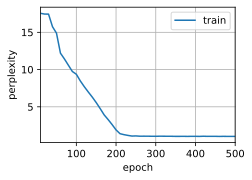

In [3]:
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

## Sumário

* Em RNNs profundos, as informações de estado oculto são passadas para a próxima etapa da camada atual e a etapa atual da próxima camada.
* Existem muitos sabores diferentes de RNNs profundos, como LSTMs, GRUs ou RNNs vanilla. Convenientemente, esses modelos estão todos disponíveis como partes das APIs de alto nível de estruturas de aprendizado profundo.
* A inicialização de modelos requer cuidados. No geral, os RNNs profundos requerem uma quantidade considerável de trabalho (como taxa de aprendizado e recorte) para garantir a convergência adequada.

## Exercícios
1. Tente implementar um RNN de duas camadas do zero usando a implementação de camada única que discutimos em :numref:`sec_rnn_scratch`.
2. Substitua o LSTM por um GRU e compare a precisão e a velocidade de treinamento.
3. Aumente os dados de treinamento para incluir vários livros. Quão baixo você pode ir na escala de perplexidade?
4. Você gostaria de combinar fontes de diferentes autores ao modelar um texto? Por que isso é uma boa ideia? O que poderia dar errado?


[Discussão](https://discuss.d2l.ai/t/1058)


<!--stackedit_data:
eyJoaXN0b3J5IjpbMzU1ODMyMDE4XX0=
-->
